# Read data from realpage

In [2]:
# %pip install matplotlib pandas requests

In [3]:
import requests
import pandas as pd

In [4]:
# Format for getting market info
markets_url = 'https://www.realpage.com/explore/assets/da-markets.json'
#
markets_list = requests.get(markets_url)
# markets_list.json() # Enumerates all
# Denver's market id is 19740

In [5]:
market_id = 19740 
properties_url = f"https://dac.realpage.com/dac/markets/{market_id}/properties"
properties_list = requests.get(properties_url)

In [6]:
properties_list.json()[0]

{'propertyId': 7971,
 'propertyName': 'Copperwood Apartments',
 'zipCode': '80003',
 'address': '8200 Sheridan Boulevard',
 'city': 'Westminster',
 'state': 'CO',
 'averageSquareFootage': 650,
 'stories': '2',
 'stable': 'stable',
 'class': 'B',
 'latitude': '39.846088',
 'longitude': '-105.050888',
 'imageHero': '/80/80/hero_565b36.jpg',
 'heroSource': 'RealPage',
 'submarketName': 'Arvada/Golden',
 'unitcount': 360,
 'yearBuilt': '1971',
 'metricData': [{'metricCode': 'MPF-ANN-RENT-CHG',
   'metricValue': 0.0458,
   'metricValueFormatted': '4.58%'},
  {'metricCode': 'MPF-HIST-CONC-RATIO',
   'metricValue': None,
   'metricValueFormatted': None},
  {'metricCode': 'MPF-HIST-ASK-RENT',
   'metricValue': 1497,
   'metricValueFormatted': '$1,497'},
  {'metricCode': 'MPF-OCC',
   'metricValue': 0.95,
   'metricValueFormatted': '95.0%'},
  {'metricCode': 'MPF-HIST-AVG-ASK-RPSF',
   'metricValue': 2.302,
   'metricValueFormatted': '$2.302'},
  {'metricCode': 'MPF-RPSF',
   'metricValue': 2.3

In [7]:
len(properties_list.json())

825

In [22]:
# Iterate and 
rp_properties_init_df = pd.DataFrame(properties_list.json())
rp_properties_init_df['yearBuilt'] = rp_properties_init_df['yearBuilt'].astype(int)
rp_properties_init_df['stories'] = rp_properties_init_df['stories'].astype(int)
rp_properties_init_df['unitcount'] = rp_properties_init_df['unitcount'].astype(int)
rp_properties_init_df['averageSquareFootage'] = rp_properties_init_df['averageSquareFootage'].astype(float)

# Convert metricData to key:value pairs from metricCode and metricValue
def convert_list_to_keyvalue(x: list):
    d = {}
    for x_item in x:
        d[x_item['metricCode']] = x_item['metricValue']
    return d
metric_aux_df = pd.json_normalize(rp_properties_init_df['metricData'].apply(convert_list_to_keyvalue))
rp_properties_df = pd.concat([rp_properties_init_df, metric_aux_df], axis = 1)
print(rp_properties_df.shape)
rp_properties_df.head()

(825, 25)


,propertyId,propertyName,zipCode,address,city,state,averageSquareFootage,stories,stable,class,...,unitcount,yearBuilt,metricData,MPF-ANN-RENT-CHG,MPF-HIST-CONC-RATIO,MPF-HIST-ASK-RENT,MPF-OCC,MPF-HIST-AVG-ASK-RPSF,MPF-RPSF,MPF-RENT
0,7971,Copperwood Apartments,80003,8200 Sheridan Boulevard,Westminster,CO,650.0,2,stable,B,...,360,1971,"[{'metricCode': 'MPF-ANN-RENT-CHG', 'metricVal...",0.0458,NaN,1497,0.950,2.302,2.302,1497
1,8544,The Lodge,80246,4697 E Louisiana Ave,Denver,CO,714.0,2,stable,B,...,284,1969,"[{'metricCode': 'MPF-RPSF', 'metricValue': 2.0...",0.0361,NaN,1475,0.958,2.065,2.065,1475
2,8765,Garden Center,80020,70 Garden Center,Broomfield,CO,519.0,3,stable,B,...,197,1973,"[{'metricCode': 'MPF-HIST-CONC-RATIO', 'metric...",0.0000,NaN,1252,0.939,2.410,2.410,1252
3,8770,Village Creek at Brookhill,80021,9052 Vance St,Westminster,CO,686.0,3,stable,B,...,324,1987,"[{'metricCode': 'MPF-HIST-ASK-RENT', 'metricVa...",0.0151,NaN,1584,0.957,2.308,2.308,1584
4,8771,Park Place on 92nd,80260,9081 Federal Blvd,Westminster,CO,793.0,3,stable,B,...,228,1974,"[{'metricCode': 'MPF-RENT', 'metricValue': 160...",-0.0003,NaN,1607,0.930,2.025,2.025,1607


In [23]:
rp_properties_df.dtypes

propertyId                 int64
propertyName              object
zipCode                   object
address                   object
city                      object
state                     object
averageSquareFootage     float64
stories                    int64
stable                    object
class                     object
latitude                  object
longitude                 object
imageHero                 object
heroSource                object
submarketName             object
unitcount                  int64
yearBuilt                  int64
metricData                object
MPF-ANN-RENT-CHG         float64
MPF-HIST-CONC-RATIO      float64
MPF-HIST-ASK-RENT          int64
MPF-OCC                  float64
MPF-HIST-AVG-ASK-RPSF    float64
MPF-RPSF                 float64
MPF-RENT                   int64
dtype: object

In [24]:
rp_properties_df.iloc[0]['metricData']

[{'metricCode': 'MPF-ANN-RENT-CHG',
  'metricValue': 0.0458,
  'metricValueFormatted': '4.58%'},
 {'metricCode': 'MPF-HIST-CONC-RATIO',
  'metricValue': None,
  'metricValueFormatted': None},
 {'metricCode': 'MPF-HIST-ASK-RENT',
  'metricValue': 1497,
  'metricValueFormatted': '$1,497'},
 {'metricCode': 'MPF-OCC',
  'metricValue': 0.95,
  'metricValueFormatted': '95.0%'},
 {'metricCode': 'MPF-HIST-AVG-ASK-RPSF',
  'metricValue': 2.302,
  'metricValueFormatted': '$2.302'},
 {'metricCode': 'MPF-RPSF',
  'metricValue': 2.302,
  'metricValueFormatted': '$2.302'},
 {'metricCode': 'MPF-RENT',
  'metricValue': 1497,
  'metricValueFormatted': '$1,497'}]

In [25]:
rp_properties_df[['averageSquareFootage', 'unitcount']].describe()

,averageSquareFootage,unitcount
count,825.000000,825.000000
mean,858.210909,248.783030
std,155.880296,139.173323
min,365.000000,10.000000
25%,767.000000,148.000000
50%,864.000000,239.000000
75%,942.000000,322.000000
max,1798.000000,1519.000000


In [26]:
rp_properties_df[['unitcount']].sum() 
# 205k units under realpage
# https://denverite.com/2024/01/16/denver-metro-apartment-rent-vacancy-rate-2023/ 414k in Denver metro overall 
# So, ~half are covered.

unitcount    205246
dtype: int64

stories
1       5
2     138
3     359
4     114
5      90
6      26
7      17
8      22
9       5
10      3
11      6
12     10
13      6
14      6
15      3
16      3
17      1
18      1
19      1
21      2
24      1
25      1
28      1
31      1
32      1
35      1
37      1
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

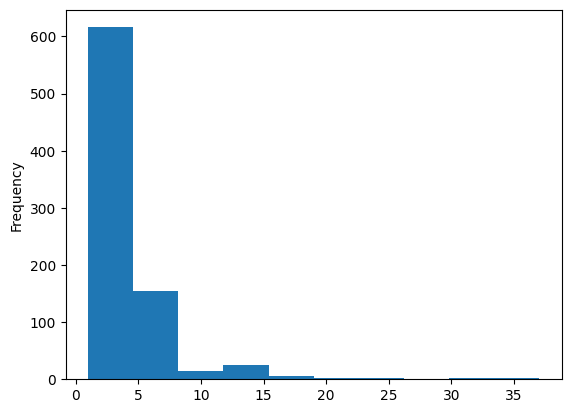

In [27]:
# Number of stories
print(rp_properties_df['stories'].astype(int).value_counts(dropna=False).sort_index())
rp_properties_df['stories'].astype(int).plot.hist()

In [28]:
# Property class typers
print(rp_properties_df['class'].value_counts(dropna=False).sort_index())
# rp_properties_df['class'].astype(int).plot.hist()

class
A       184
B       411
C       229
None      1
Name: count, dtype: int64


yearBuilt
1909     1
1924     1
1933     1
1935     2
1940     1
        ..
2018    47
2019    34
2020    40
2021    23
2022    24
Name: count, Length: 70, dtype: int64


<Axes: ylabel='Frequency'>

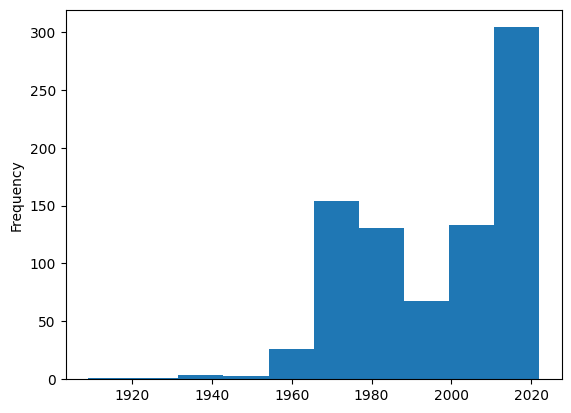

In [29]:
# Year Built
print(rp_properties_df['yearBuilt'].astype(int).value_counts(dropna=False).sort_index())
rp_properties_df['yearBuilt'].astype(int).plot.hist()

unitcount
10      1
12      2
21      1
23      2
24      2
       ..
710     1
727     1
760     1
959     1
1519    1
Name: count, Length: 358, dtype: int64


<Axes: ylabel='Frequency'>

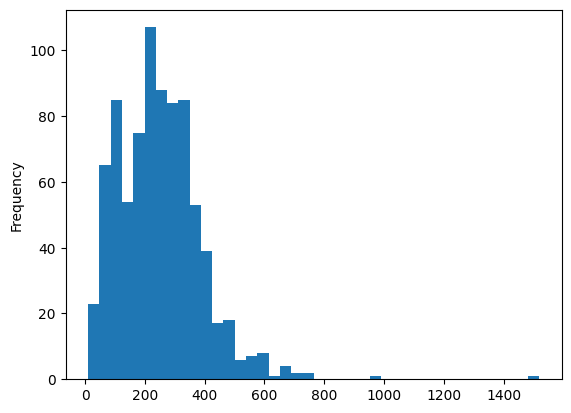

In [30]:
# Units
print(rp_properties_df['unitcount'].astype(int).value_counts(dropna=False).sort_index())
rp_properties_df['unitcount'].astype(int).plot.hist(bins=40)

<Axes: ylabel='Frequency'>

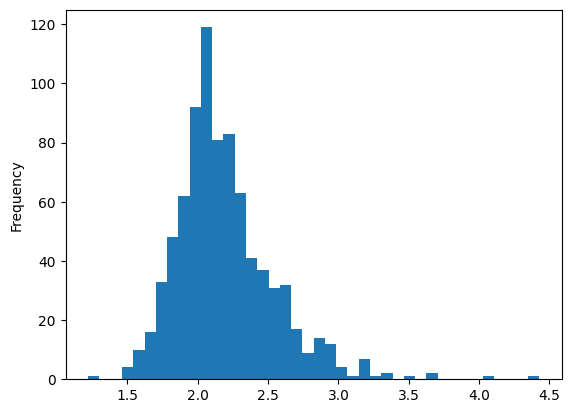

In [31]:
# Price / sq distribution
rp_properties_df['MPF-RPSF'].astype(float).plot.hist(bins=40)

       count      mean       std    min     25%    50%      75%    max
class                                                                 
A      184.0  2.684821  0.302278  2.159  2.4860  2.614  2.80525  4.427
B      411.0  2.161496  0.125132  1.782  2.0615  2.155  2.24950  2.545
C      229.0  1.847786  0.134632  1.221  1.7600  1.869  1.94900  2.175


class
A    Axes(0.125,0.11;0.775x0.77)
B    Axes(0.125,0.11;0.775x0.77)
C    Axes(0.125,0.11;0.775x0.77)
Name: MPF-RPSF, dtype: object

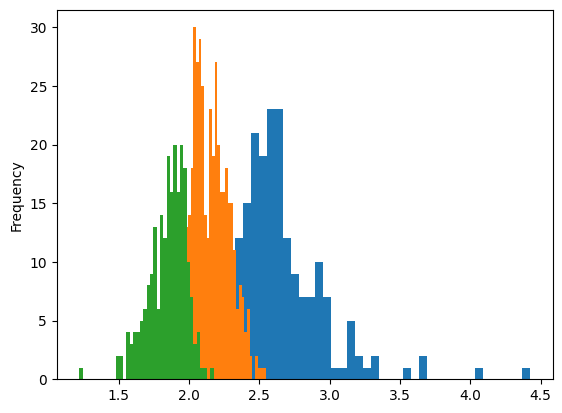

In [32]:
# Price / sq distribution grouped by class
print(rp_properties_df.groupby('class')['MPF-RPSF'].describe())
rp_properties_df.groupby('class')['MPF-RPSF'].plot.hist(bins=40)

<Axes: xlabel='yearBuilt', ylabel='MPF-RPSF'>

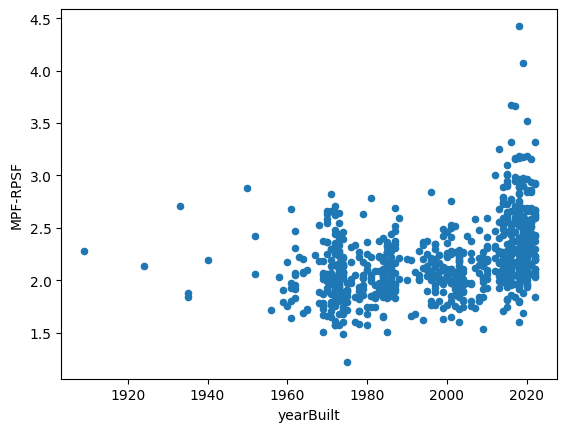

In [33]:
# Price / sq distribution
rp_properties_df[['MPF-RPSF', 'yearBuilt']].plot.scatter(y='MPF-RPSF', x='yearBuilt')

submarketName
Arvada/Golden                            Axes(0.125,0.11;0.775x0.77)
Broomfield                               Axes(0.125,0.11;0.775x0.77)
Downtown/Highlands/Lincoln Park          Axes(0.125,0.11;0.775x0.77)
Five Points/Capitol Hill/Cherry Creek    Axes(0.125,0.11;0.775x0.77)
Glendale                                 Axes(0.125,0.11;0.775x0.77)
Highlands Ranch                          Axes(0.125,0.11;0.775x0.77)
Littleton                                Axes(0.125,0.11;0.775x0.77)
North Aurora                             Axes(0.125,0.11;0.775x0.77)
North Lakewood/Wheat Ridge               Axes(0.125,0.11;0.775x0.77)
Northeast Denver                         Axes(0.125,0.11;0.775x0.77)
Parker/Castle Rock                       Axes(0.125,0.11;0.775x0.77)
South Denver/Englewood                   Axes(0.125,0.11;0.775x0.77)
South Lakewood                           Axes(0.125,0.11;0.775x0.77)
Southeast Aurora/East Arapahoe County    Axes(0.125,0.11;0.775x0.77)
Southeast Denver    

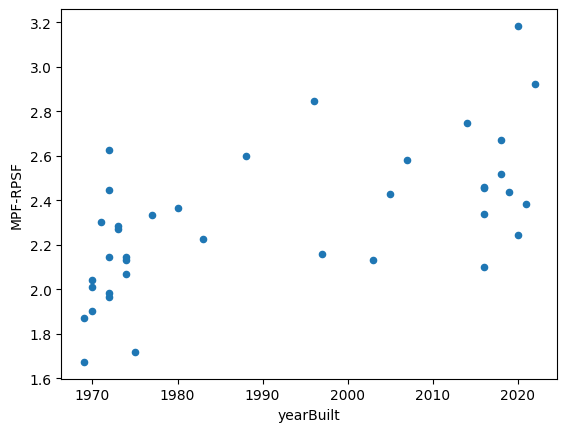

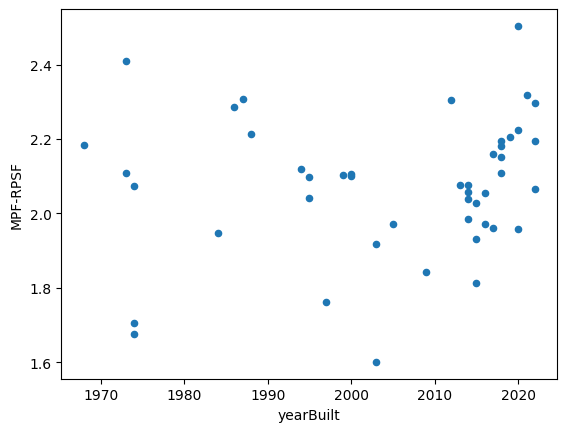

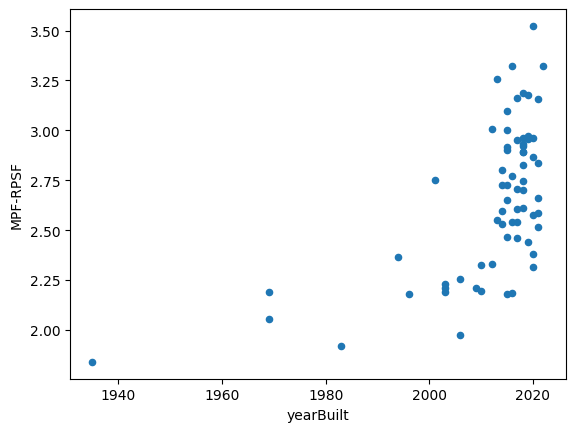

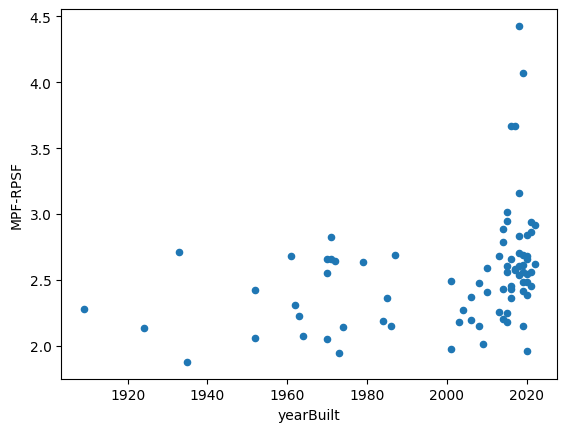

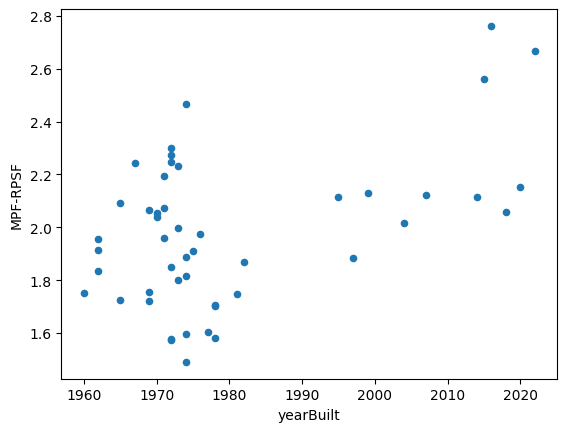

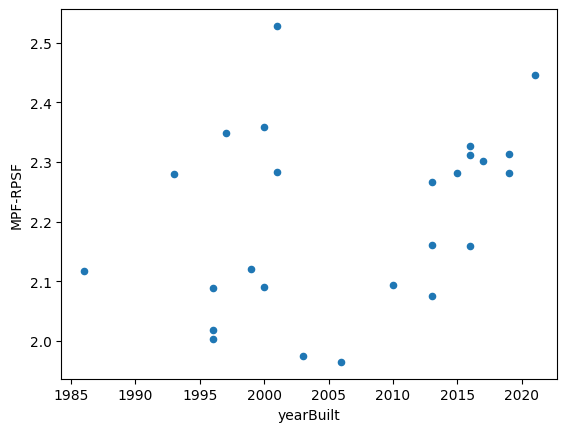

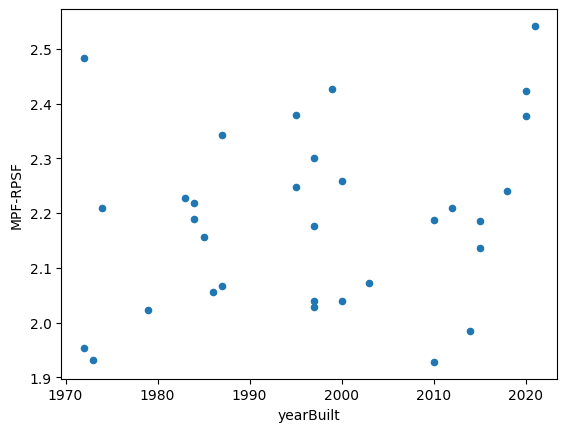

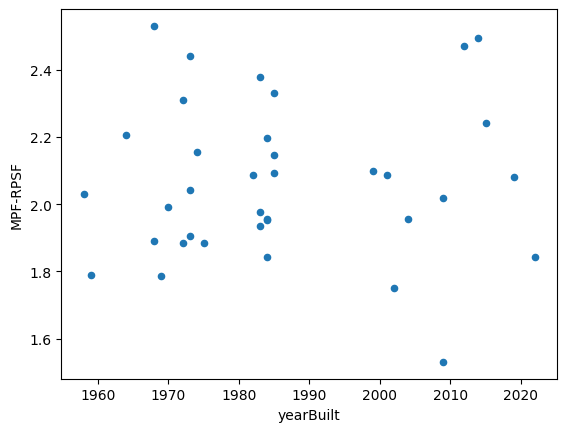

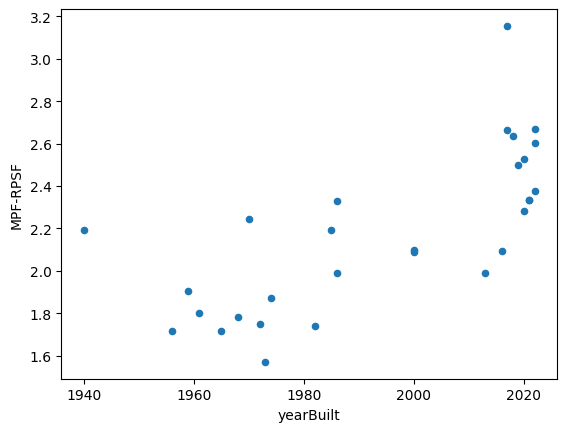

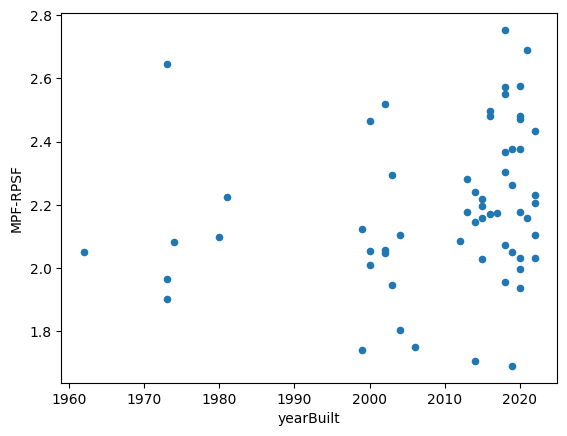

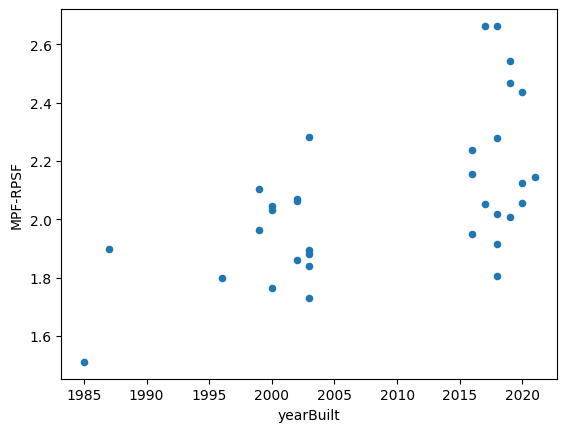

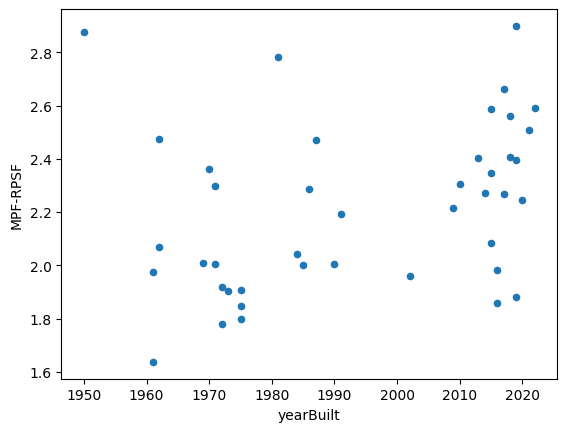

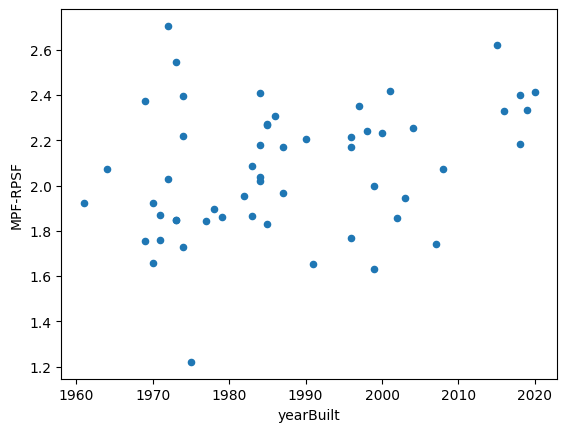

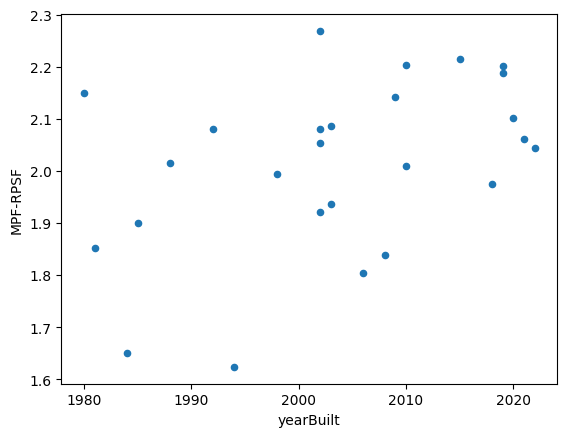

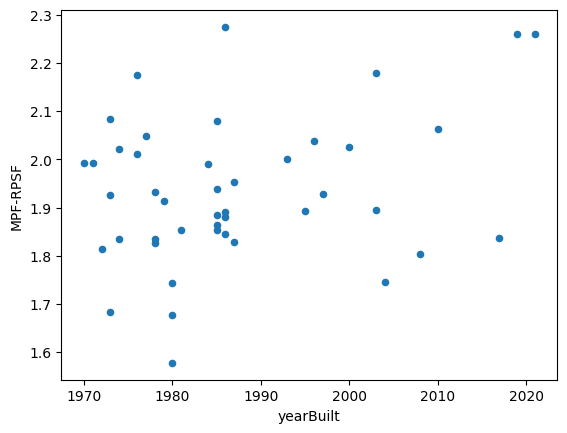

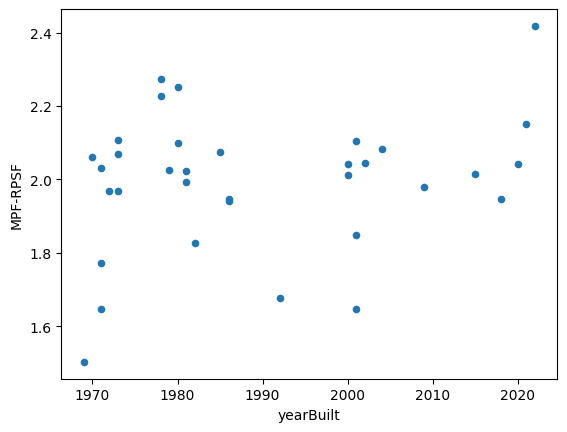

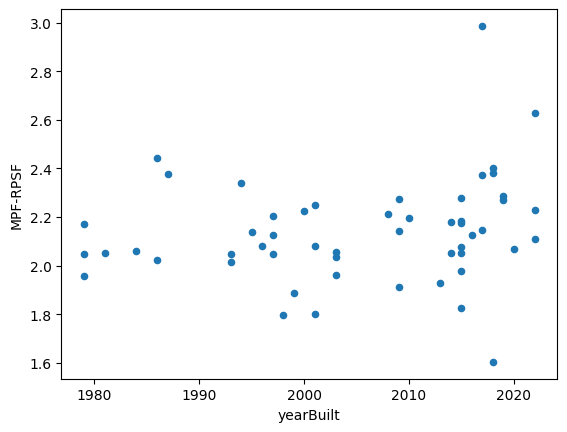

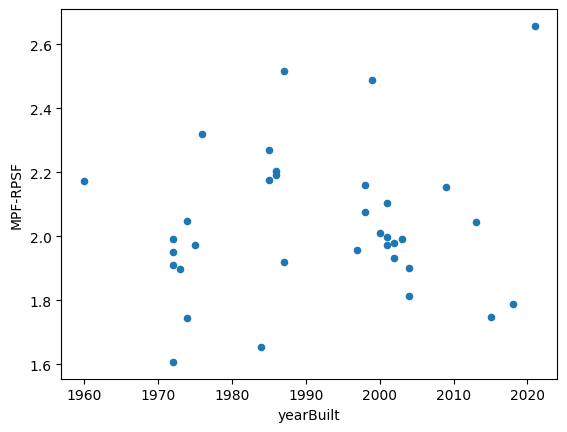

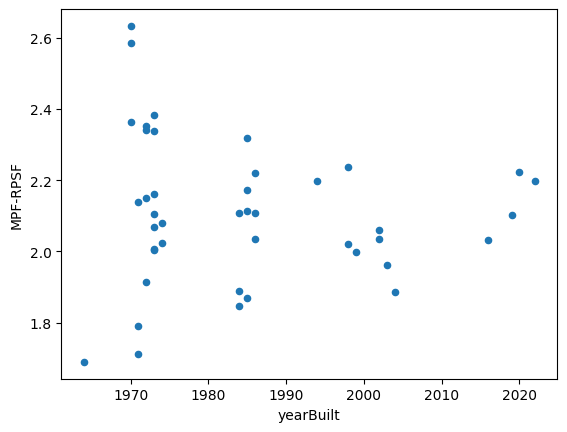

In [37]:
rp_properties_df[['MPF-RPSF', 'yearBuilt', 'submarketName']].groupby('submarketName').plot.scatter(y='MPF-RPSF', x='yearBuilt')

In [34]:
650*2.5

1625.0

In [35]:
2000/650

3.076923076923077